## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
import seaborn as sns

In [2]:
df = pd.read_csv("students-data.csv",delimiter=";")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [3]:
df.rename_axis('number', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [4]:
df1=df.select_dtypes(include=object)
print(df1.columns.tolist())

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [5]:
df2=df.select_dtypes(include=int)

In [6]:
df2=df2.loc[:,df2.var()>=1]

In [7]:
df2

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,
0,18,4,4,4,1,3,6,5,6,6
1,17,1,1,3,1,3,4,5,5,6
2,15,1,1,2,3,3,10,7,8,10
3,15,4,2,2,1,5,2,15,14,15
4,16,3,3,2,2,5,4,6,10,10
5,16,4,3,2,2,5,10,15,15,15
6,16,2,2,4,1,3,0,12,12,11
7,17,4,4,4,1,1,6,6,5,6
8,15,3,2,2,1,1,0,16,18,19


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [8]:
mask = df1.dtypes==object
cols = df1.columns[mask].tolist()
le = LabelEncoder()
df1[cols] = df1[cols].apply(lambda col: le.fit_transform(col))
df1

/Users/bharath/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
5,0,1,1,1,1,3,2,3,1,0,1,1,1,1,1,1,0
6,0,1,1,1,1,2,2,1,1,0,0,0,0,1,1,1,0
7,0,0,1,0,0,2,4,1,1,1,1,0,0,1,1,0,0
8,0,1,1,1,0,3,2,1,1,0,1,1,0,1,1,1,0


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [9]:
data1=pd.DataFrame(np.where(df2[['G1','G2','G3']] >= 10, 1, 0), columns=['G1','G2','G3'])
data1.rename_axis('number', inplace = True)
data2=df2.drop(['G1','G2','G3'],axis=1)
data=data2.merge(data1,on='number').merge(df1,on='number')
data

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,0,0,0,...,0,1,1,0,0,0,1,1,0,0
1,17,1,1,3,1,3,4,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,2,3,3,10,0,0,1,...,2,1,1,0,1,0,1,1,1,0
3,15,4,2,2,1,5,2,1,1,1,...,1,1,0,1,1,1,1,1,1,1
4,16,3,3,2,2,5,4,0,1,1,...,1,0,0,1,1,0,1,1,0,0
5,16,4,3,2,2,5,10,1,1,1,...,3,1,0,1,1,1,1,1,1,0
6,16,2,2,4,1,3,0,1,1,1,...,1,1,0,0,0,0,1,1,1,0
7,17,4,4,4,1,1,6,0,0,0,...,1,1,1,1,0,0,1,1,0,0
8,15,3,2,2,1,1,0,1,1,1,...,1,1,0,1,1,0,1,1,1,0


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [10]:
X = data.drop(labels= 'G3' , axis = 1)
y=data[['G3']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=8)

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

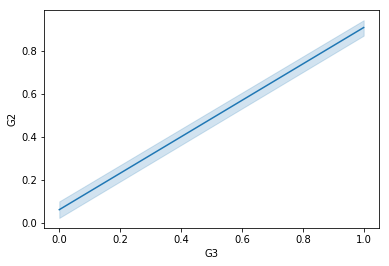

In [11]:
data3=data1.drop(['G1'],axis=1)
sns.lineplot(x=data3['G3'],y=data3['G2'])


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

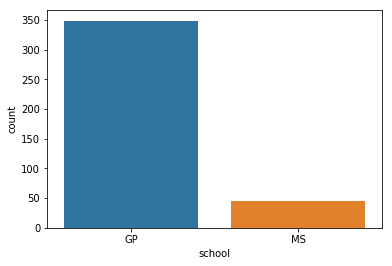

In [12]:
sns.countplot(x=df['school'])

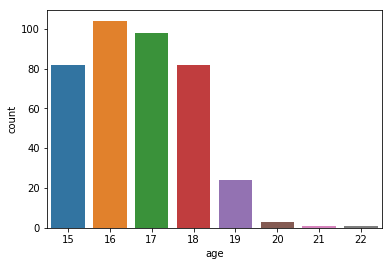

In [13]:
sns.countplot(x=df['age'])

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [14]:
print(X_train.count())
print(y_train.count())
print(X_test.count())
print(y_test.count())

age           300
Medu          300
Fedu          300
goout         300
Walc          300
health        300
absences      300
G1            300
G2            300
school        300
sex           300
address       300
famsize       300
Pstatus       300
Mjob          300
Fjob          300
reason        300
guardian      300
schoolsup     300
famsup        300
paid          300
activities    300
nursery       300
higher        300
internet      300
romantic      300
dtype: int64
G3    300
dtype: int64
age           95
Medu          95
Fedu          95
goout         95
Walc          95
health        95
absences      95
G1            95
G2            95
school        95
sex           95
address       95
famsize       95
Pstatus       95
Mjob          95
Fjob          95
reason        95
guardian      95
schoolsup     95
famsup        95
paid          95
activities    95
nursery       95
higher        95
internet      95
romantic      95
dtype: int64
G3    95
dtype: int64


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

/Users/bharath/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bharath/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)
print("Training Score:",model_train_score)
print("Test Score:",model_test_score)
print("F1 Score:",metrics.f1_score(y_test,y_predict))

Training Score: 0.9166666666666666
Test Score: 0.9263157894736842
F1 Score: 0.9411764705882353


# Naive bayes with Iris data

### Import Iris.csv

In [17]:
iris=pd.read_csv("Iris_external.csv")

In [18]:
iris.head(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [19]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [20]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [21]:
X=iris.drop(labels= 'Class' , axis = 1)
y=iris['Class']

### Find the distribution of target variable (Class)

In [22]:
iris['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

### Plot the distribution of target variable using histogram

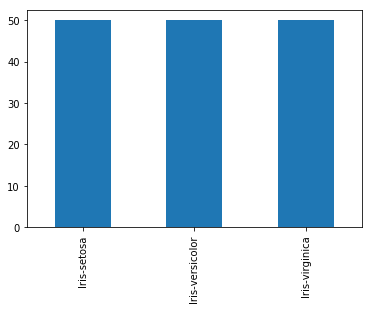

In [23]:
pd.value_counts(iris["Class"]).plot(kind="bar")

In [24]:
mask = iris.dtypes==object
cols = iris.columns[mask].tolist()
le = LabelEncoder()
iris[cols] = iris[cols].apply(lambda col: le.fit_transform(col))

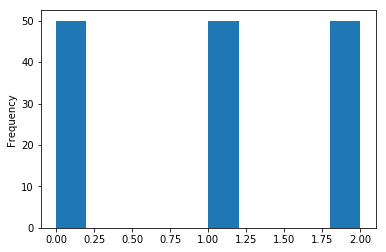

In [25]:
iris['Class'].plot.hist()

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

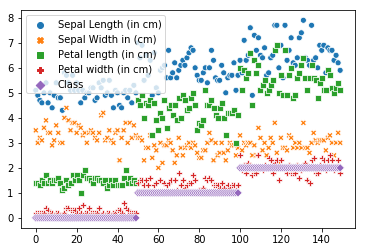

In [26]:
sns.scatterplot(data=iris,hue=iris['Class'])

The three set of classes are scattered in three equal halves. since sepal width is almost the same for all the classes it cant be of help in predicting the class variable . the rest of three variables could help us in predicting the class out of which petal length and petal width values could help us achieve higher accuracy scores of predicting

### Summary Statistics and explain insights for at least 2 variables

after understanding the scatter plot we can jump to a conclusion that Petal length and Petal width are much relative towards the class variable. the distance between the two variables can help us predict the class variable. 

Petal length for Class 

### Correlation among all variables and give your insights

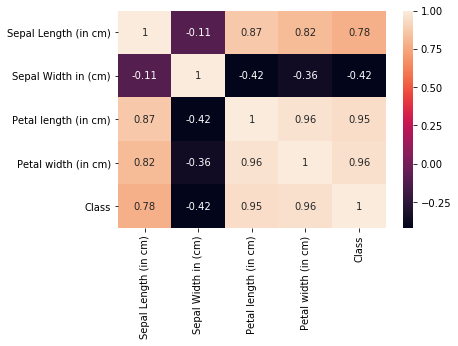

In [29]:
sns.heatmap(iris.corr(),annot=True)

The above heat map shows that the class of the data set is highly depended on petal length and petal width . so these two variables could help us in predicting the class for a fresh set of values with a higher accuracy score.

### Do Feature Scaling

Naive-Bayes models are not affected by feature scaling.

### Split data in Training and Validation in 80:20

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

### Train and Fit NaiveBayes Model

In [31]:
model = GaussianNB()

In [32]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
predicted = model.predict(X_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [34]:
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)
print("Training Score:",model_train_score)
print("Test Score:",model_test_score)

Training Score: 0.95
Test Score: 0.9666666666666667


In [35]:
metrics.confusion_matrix(predicted, y_test)

array([[11,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  6]])

Thus the model is devloped with an accuracy score of 96 % . The accuracy score of the model can be improved by reducing the error of false predictions. it can be achieved by finding the optimal threshold value of the probability of predictions.